In [3]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 142kB/s 
ERROR: tensorflow 2.2.0rc3 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [5]:
import scipy
print(scipy.__version__)

1.1.0


In [0]:
from scipy.misc import imresize

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [8]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k

In [10]:
def reshape(x):
  img = imresize(x.reshape(28,28),(14,14))
  return img


XX_train = np.array([*map(reshape,X_train.astype(float))])
XX_test = np.array([*map(reshape,X_test.astype(float))])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [0]:
XX_train  = X_train/255
X_train = X_train/255

XX_test = X_test/255
X_test = X_test/255

batch_size = 128
epochs = 40
input_shape = (14,14,1)

In [0]:
def make_autoencoder(input_shape):
  generator = Sequential()
  generator.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=input_shape))
  generator.add(MaxPooling2D(pool_size=(2,2)))
  generator.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  generator.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  generator.add(UpSampling2D((2,2)))
  generator.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  generator.add(UpSampling2D((2,2)))
  generator.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))
  return generator

In [16]:
autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002,
                                                                beta_1=0.5))

autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1),
                                    X_train.reshape(-1,28,28,1),
                                    batch_size=batch_size,
                                    epochs=epochs, verbose=1,
                                    validation_split = 0.2)

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 312s 6ms/step - loss: 0.0290 - val_loss: 0.0104
Epoch 2/40
48000/48000 [==============================] - 312s 7ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 3/40
48000/48000 [==============================] - 314s 7ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 4/40
48000/48000 [==============================] - 312s 7ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 5/40
48000/48000 [==============================] - 312s 6ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/40
48000/48000 [==============================] - 313s 7ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/40
48000/48000 [==============================] - 313s 7ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/40
48000/48000 [==============================] - 312s 7ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/40
48000/48000 [==============================] - 313s 7ms/step - loss: 0.0032 - val_loss: 0.0

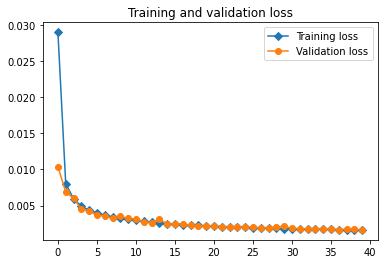

Input


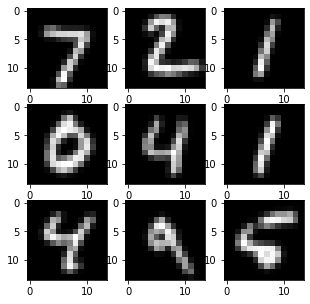

GENERATED


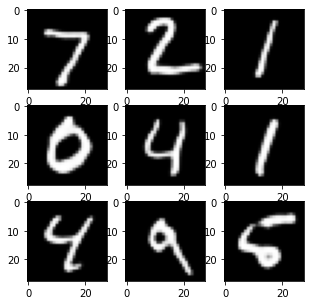

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k

# for resizing images
from scipy.misc import imresize

def reshape(x):
    """Reshape images to 14*14"""
    img = imresize(x.reshape(28,28), (14, 14))
    return img

# create 14*14 low resolution train and test images
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])

# scale images to range between 0 and 1
#14*14 train images
XX_train = XX_train/255
#28*28 train label images
X_train = X_train/255

#14*14 test images
XX_test = XX_test/255
#28*28 test label images
X_test = X_test/255

batch_size = 128
epochs = 40
input_shape = (14,14,1)

def make_autoencoder(input_shape):

    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                         input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))

    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002,
                                                                beta_1=0.5))

autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1),
                                    X_train.reshape(-1,28,28,1),
                                    batch_size=batch_size,
                                    epochs=epochs, verbose=1,
                                    validation_split = 0.2)

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()